<a href="https://colab.research.google.com/github/MudassirABBASSi/Deep-Learning-/blob/main/Transfer_Learning_with_different_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d salader/dogs-vs-cats

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 171MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense
from keras.applications.vgg16 import VGG16,preprocess_input




# vgg16

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 251ms/step - accuracy: 0.8355 - loss: 0.3842 - val_accuracy: 0.9064 - val_loss: 0.2107


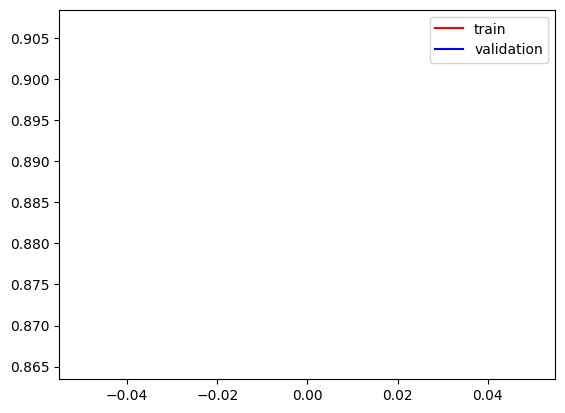

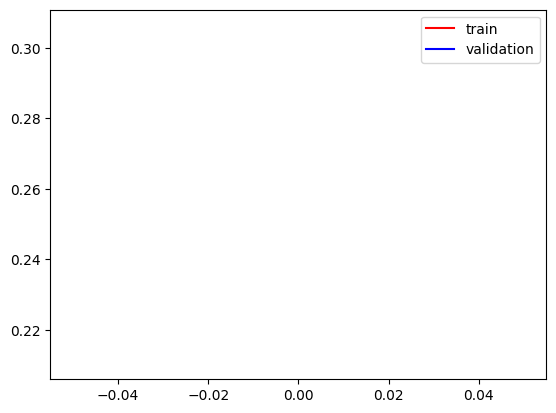

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
Predicted class: Cat


In [44]:
conv_base = VGG16(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

conv_base.trainable =False


batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# prompt: i want to predict the image which url is  /content/download.jpeg

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/test/cats/cat.10.jpg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model.predict(x)

if prediction[0][0] > 0.5:
  print("Predicted class: Dog")
else:
  print("Predicted class: Cat")





# vgg19

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 265ms/step - accuracy: 0.8032 - loss: 0.4630 - val_accuracy: 0.8934 - val_loss: 0.2536


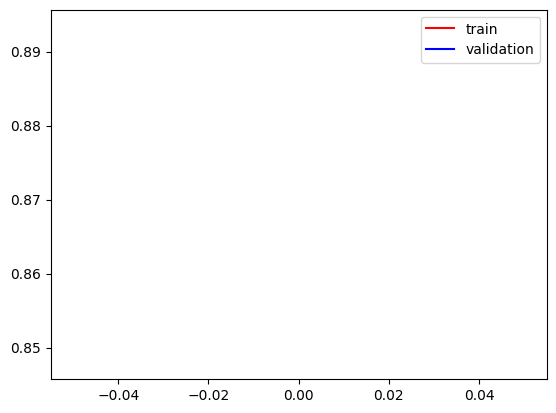

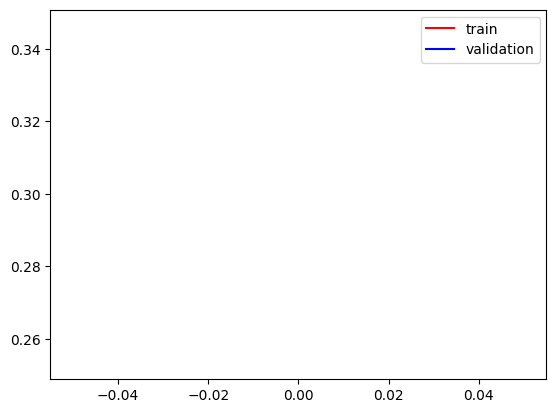

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
Predicted class: Cat


In [45]:
from keras.applications.vgg19 import VGG19

conv_base1 = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)





model1 = Sequential()
model1.add(conv_base1)
model1.add(layers.Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

conv_base1.trainable =False


batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# prompt: i want to predict the image which url is  /content/download.jpeg

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/test/cats/cat.10.jpg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model1.predict(x)

if prediction[0][0] > 0.5:
  print("Predicted class: Dog")
else:
  print("Predicted class: Cat")





# ResNet50V2

In [ ]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19



# ResNet50V2
conv_base2 = ResNet50V2(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)

model2 = Sequential()
model2.add(conv_base2)
model2.add(layers.Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

conv_base2.trainable = False

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator)

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()




Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
248/625 ━━━━━━━━━━━━━━━━━━━━ 1:16 203ms/step - accuracy: 0.9054 - loss: 1.7854

In [ ]:
img = image.load_img("/content/images.jpeg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model2.predict(x)

if prediction[0][0] > 0.5:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")

In [ ]:


from tensorflow.keras.applications import MobileNet

conv_base3 = MobileNet(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet',
)

model3 = Sequential()
model3.add(conv_base3)
model3.add(layers.Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

conv_base3.trainable = False

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator)

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()



img = image.load_img("/content/images.jpeg", target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

prediction = model3.predict(x)

if prediction[0][0] > 0.5:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")
